# Getting Started With Landsat Data  

| Author(s):  | [Arapaut Sivaprasad](mailto:Sivaprasad.Arapaut@ga.gov.au)|
|----------|----------------|
| Created: | May 02, 2018 |
| Last edited: | May 16, 2018 |
| Acknowledgements: | Claire Krause and USGS|

## DISCLAIMER

This is NOT an official release of the [User Guide](http://geoscienceaustralia.github.io/digitalearthau/notebooks/DEA_datasets/GettingStartedWithLandSats5-7-8.html#Retrieve-and-plot-the-data-from-Landsats-5,-7-and-8) to get started with Landsats data. This document contains all the working code and descriptions included in the official release, plus a great deal more information gathered from the web and also synthesised from gained knowledge. These additional bits of information are not included in the official release to avoid intimidating a user with too much details. Appropriate references to third party data are given as links and references, appearing as **[n]** throughout the text, but not all sentences given here may be searchable on the web. Inferred knowledge are given as explanatory notes in between the quoted details. Though every care has been taken to  acknowlede third parties, omissions may have occurred unintentionally.

## SECTION 1 - Understand the landsat satellites

#### [SKIP SECTION 1](#SECTION-2---Retrieve-and-examine-the-data)
**Background:** Data  from three Landsats (5,7 and 8) are available to access within DEA. This document is a detailed description about the data and how to retrieve it. The code snippets in this doc should let you examine the data. The descriptions about the satellites and data structure are for the beginners. if you are an expert user of the system, you can skip the introductory sections by clicking the link above.

**What does this document do?**

- Explain some facts about the satellite, how the observations are made, how the data is collected, etc. 
    - This info is for a beginner user. Skip it if you are already familiar with the satellite(s) and their data.

- Show how to open a datacube to retrieve the data for various time points and geo-coordinates.

- Explain the data corrections.

- Plot a scene as true colour image.

- Plot the same as false colour image.

- Compare some scenes side-by-side.

- Filter scenes using pixel quality.

- Mask a cloudy image.

- Plot up the pixel quality information for the same scene.

- Use the pixel quality information to create a mask, and apply it to the spectral data

**How to use this document:**

**Section 1** is a brief introduction to the Landsat family of satellites such as how they operate, collect data, global administration, data transmission, etc. This part is for the benefit of those who are new to the system. Others can skip this section and go straight to **section 2** which describes how to load the data, examine it, plot the scenes, etc.

The details in Section 1 come from several web pages, as well as interpreted knowledge. Hypertext links, like **[i]**, are provided to read more when the details come from web pages. There is not always a word-for-word correlation with the web pages and, therefore, searching for a string may not get results. No hypertext links are possible to the interpreted knowledge, yet! Feel free to contact the author(s) for clarification and/or comments. 

Comments for the code are meant to make it easier for non-programmers to understand the code. They can be skipped by experienced users. A basic understanding of *any* programming language is assumed, so that some terms will make sense, but one doesn't have to be an expert programmer to manipulate the code to get and display the data. 

You can take a copy of the [**source file**](https://github.com/GeoscienceAustralia/dea-notebooks/blob/asivapra/DEA_datasets/GettingStartedWithLandSats5-7-8.ipynb) of the official release and make changes in code or comments. After any change, execute the code with **SHIFT-Enter** to see the effect of the change.

This doc applies to the following landsats and data correction methods:
- landsat 5
- landsat 7
- landsat 8
- NBAR
- NBAR-T

### About Landsats
Source: https://landsat.usgs.gov/landsat-missions-timeline

For over 40 years the Landsat series of satellites provided the longest temporal record of moderate resolution multispectral data of the Earth's surface on a global basis. The Landsat record has remained remarkably unbroken, proving a unique resource to assist a broad range of specialists in managing the world's food, water, forests, and other natural resources for a growing world population.  It is a record unmatched in quality, detail, coverage, and value.

Landsat represents the world's longest continuously acquired collection of space-based moderate-resolution land remote sensing data. Four decades of imagery provides a unique resource for those who work in agriculture, geology, forestry, regional planning, education, mapping, and global change research. Landsat images are also invaluable for emergency response and disaster relief.

As a joint initiative between the U.S. Geological Survey (USGS) and NASA, the Landsat Project and the data it collects support government, commercial, industrial, civilian, military, and educational communities throughout the United States and worldwide.

**Landsat Missions TimeLine** [[1](https://landsat.usgs.gov/landsat-missions-timeline)]

In the mid-1960s an ambitious effort to develop and launch the first civilian Earth observation satellite was started. The goal was achieved on July 23, 1972, with the launch of the Earth Resources Technology Satellite (ERTS-1), which was later renamed Landsat 1. The launches of Landsat 2, Landsat 3, and Landsat 4 followed in 1975, 1978, and 1982, respectively.

![Landsats 1 to 8](landsats1-8.png)

When Landsat 5 was launched in 1984, no one could have predicted that the satellite would continue to deliver high quality, global data of Earth's land surfaces for 28 years and 10 months. Landsat 6, however, failed to achieve orbit in 1993.

Landsat 7 was successfully launched in 1999 and, along with Landsat 8, launched in 2013, continues to provide daily global data. Landsat 9 is planned to be launched in late 2020.

Given below is a timeline of the various Landsats.

![Fig 1. Timeline of the working lives of Landsats since 1972](TimelineOnlyForWebRGB.jpg)


### Basic details about the landsats 5 to 9
Sources: Follow the links below for each satellite.

| Name | Launch Date | End Date | Sensors | Orbit | Repeat Cycle | Bands | Data Rate | 
| -----|-------------|----------|--------------------|----------|-------|--------------|-----------|
| [Landsat_5](https://landsat.usgs.gov/landsat-5-history) | Mar 1, 1984 | June 5, 2013 | MSS, TM | Sun-synchronous, near-polar orbit at 705km | 16 days | 7 | 85 Mbps |
| [Landsat_6](https://landsat.usgs.gov/landsat-6-history) | Oct 5, 1993 | (did not achieve orbit) ||||||
| [Landsat_7](https://landsat.usgs.gov/landsat-7-history) | Apr 15, 1999 | Current | ETM+ | Do. | 16 days | 8 | 150 Mbps |
| [Landsat_8](https://landsat.usgs.gov/landsat-8-mission) | Feb 11, 2013 | Current | OLI, TIRS | Do. | 16 days | 11 | 260.92 and 384&nbsp;Mbps |
| [Landsat_9](https://landsat.usgs.gov/landsat-9-mission) | Dec, 2020 | 5 years from launch | OLI-2, TIRS-2| Sun-synchronous orbit at an altitude of 438 miles | 16 days | 11 | 384 Mbps |

**Table 1. Details of the different landsats**


### Explanation of terms

All these satellites orbit over the polar regions, and take 98.9 minutes to complete one cycle around the Earth at a speed of 7.5 km per sec. It means that there will be 14.56 cycles per day. The orbit is inclined at 98.2&deg; and, therefore, each cycle moves the path to the East at a rate equal to the rotation of Earth relative to the Sun ("Sun-synchronous"). Therefore, the clock time it passes a point on the Earth's surface remains the same in every cycle. For Landsat 5 it was 9:45am +/- 15 minutes when it passes over the equator, and for Landsats 7 and 8 it is 10am +/- 15 minutes. This variability in time is due to the timezones being 1 hour apart (well, mostly!) over equator. Since the satellite crosses the equator every 1.5 hour, it will be 15 minutes on either side of the next timezone. The satellites cover the entire face of Earth in 16 days, as explained below.

#### The "Swath" [[2](https://landsat.usgs.gov/landsat-7-data-users-handbook-section-2)]
"Everytime it passes over Earth, the sateliites scan the surface as a band of 185 km in width, which is called **swath**. The equatorial circumference of Earth is 40,075 km and therefore a band of 172 km is required to cover the entire surface in 16 days at 14.56 cycles per day (40,075 / (16 * 14.56) = 172). A swath of 185 km means that there will be an overlap of 7.3&deg; (172 + 7.3% = 184.56) at the equator, and increasing overlaps moving towards North and South. Figure 2 below shows how the swath pattern looks like over North America."

![Figure 2. Landsat 7 swath separations](Landsat_7_swath.jpg)

Given below is a pattern of swaths for just over a day across the globe. Green lines are "ascending" (going North) and blue are "descending"[[3](https://landsat.usgs.gov/landsat_acq#acquisitionCalendar)].

![Figure 3. Pattern of swaths across the globe in a single day.](Landsat_8_aquisition_pattern.JPG)

#### "Rows",  "Paths" and "Scenes"
Since the satellite is passing in a North to South direction, and the inclination makes it move Eastwards, there are two kinds of coverage. The North-South (or vice versa; "vertical") coverage is called **Row** and West to East coverage is called **Path** ("horizontal"). Let us examine below what these mean.

A **row** maybe defined as the surface distance covered in 23.92 seconds of the satellite's motion in the vertical direction. The polar circumference of the Earth is 39,931 km and the satellite covers it in 98.9 min. Thus, in 23.92 seconds the satellite will cover 161 km (39,931/(98.9\*60) * 23.92 = 160.96) in either direction. Hence, there will be **248 rows per day** (39931/161 = 248).

The rows have been assigned in such a way that Row 60 coincides with the Equator (descending node). Row 1 of each path starts at 80° 46' N and the numbering increases southward to latitude 81° 51' S (Row 122). Then, beginning with Row 123, the row numbers ascend northward, cross the Equator (Row 184) and continue to latitude 81° 51' N (Row 246). Row 248 is located at latitude 81° 21' N, whereupon the next path begins.

The **path** is defined as the width of a swath, which is 172 km at the equator (allowing for the overlap of 7.3% with the actual width of 185 km) and there will be 233 paths to cover the entire surface (40,075 / 172 = 232.99). Hence, there will be **233 paths** per 16 days which is the time it takes to cover the full surface.

The **scene** is a composite picture captured in 23.92 seconds, as the satellite passes over. Since we know that the swath is 185 km and row is 161 km, the dimensions of each scene will be 185 x 161 km. Also, there can be a total of 57,784 possible scenes (248 rows * 233 paths) to be captured in a 16-day cycle. The actual number of scenes captured ("acquisitions") is much less that this, and we shall see about it below.
</div>

#### "Acquisitions" [[5](https://landsat.usgs.gov/landsat-7-data-users-handbook-section-4)]
<div style="text-align:justify">
Even though there are 57,784 possible scenes in 16 days (or 3,612 per day) the number of acquisitions by landsat 7 averages around 450 per day, and that by landsat 8 averages around 650 per day [[4](https://landsat.usgs.gov/landsat-7-data-users-handbook-section-1)]. 

The ETM+ sensor does not continually acquire imagery data as it orbits the Earth. Instead, acquisitions are scheduled in advance using the Landsat 7 Long Term Acquisition Plan (LTAP), data files in conjunction with a software scheduler. The scheduler automatically selects the best scenes in accordance with the LTAP, basing these decisions on cloud-cover forecasts, urgency of acquisition, and availability of resources to optimize fulfillment of the overall Landsat 7 mission goals.

Acquisitions are also limited by physical constraints of the instrument. Cloud avoidance is a major factor in the selection of the scenes rejected. The benefits of this acquisition strategy are an increase in the number of scenes that can be acquired, along with a reduction in instrument duty cycle and the number of power cycles required. The goal is to acquire more images with more frequent revisits over the continental land masses without increasing risk to the mission.
</div>

**The factors that are considered during scheduling are:**

-	Seasonality of vegetated regions, as well as niche-science communities with specific acquisition needs
-	Predicted vs. nominal cloud-cover (forecast vs. statistical assessments)
-	Solar elevation angle (especially important at high latitudes)
-	Missed opportunities for previous acquisitions
-	Quality (based on cloud-cover assessments) of previous acquisitions
-	Scene clustering (for continuity of swath observations)
-	System constraints (e.g., instrument duty cycle, ground station locations and functionality, recorder capacity)

**Also, niche communities initially sponsored the following locations and associated time windows:**

-	282 agriculture areas (acquire every season if cloud cover predict < 60%)
-	35 calibration sites (acquire "always")
-	896 reefs (acquire from 2x to 6x each year)
-	30 fire-impacted areas (acquire "always")
-	1392 land ice scenes other than Antarctica (acquire once during certain months)
-	3601 Antarctica scenes (acquire once during Jan-Feb)
-	60 oceanic islands (acquire twice each year)
-	1175 rainforest areas (acquire "always" all year)
-	352 sea ice scenes (acquire from 1x to 3x each year)
-	11 Siberia scenes (acquire "always" over 9 months)
-	72 volcanoes (acquire from 2x to 12x during year, including night)

An acquisition request is granted a priority increase as a function of the number of consecutive past cycles in which the opportunity to acquire the requested scene was not fulfilled. For example, if the last successfully acquired image of a scene was 48 days ago, then a request for this scene is granted a priority increase based on two missed opportunities from 32 and 16 days ago. In addition, all new requests submitted when an acquisition window opens are also given a priority increase to help them compete with established requests.

As the map below shows, the numbers of acquisitions vary between regions [[5](https://landsat.usgs.gov/LTAP7)]. The maximum possible scenes collected over a whole year is 23 (365/16 = 22.81) and this occurs at most parts of the world as shown below. Obviously, there is no point in acquiring a scene over the ocean. 

![Figure 4. Landsat 7 ETM+ scenes acquired in 2016](Landsat7_acquisitions.png)


### More technical details for the inquisitive
#### [SKIP IT](#SECTION-2---Retrieve-and-examine-the-data)

#### Scan Line Corrector [[5](https://landsat.usgs.gov/landsat-7-data-users-handbook-section-2)]

The Scan Line Corrector (SLC) is an electro-optical mechanism composed of two parallel mirrors set at an angle on a shaft. The SLC is positioned behind the primary optics and compensates for the along-track motion of the spacecraft occurring during an active SMA cross-track scan. As a result, a rectilinear scan pattern is produced using the SLC instead of the zigzag pattern that would be produced without it (see Fig 5).

![Fig 5. ETM+ scan line corrector (SLC) effect.](scan_line_corrector.jpg)

What causes the above can be explained as below. 

A scan takes 143 milliseconds. The satellite is moving at 7.5 km per second and, hence, during the scan from left to right (or vice versa) of the swath, it has travelled 1.07 km and the line is not horizontal but is slanted up or down. The SLC is presumably tilting the sensor in the opposite direction to make it a horizontal line. Without it, a zig-zag pattern results, and about 22% of data is lost. The software-mediated compensation is by interpolating the missing data.

On May 31, 2003, the SLC failed. Subsequent efforts to recover the SLC were not successful, and the problem is permanent for the mission. Without an operating SLC, the ETM+ line of sight now traces a zig-zag pattern along the satellite ground track (see Fig 5 above) resulting in wedge shaped scan-to-scan gaps (and alternating overlap areas) which increase in magnitude away from nadir. Despite the SLC failure, Landsat 7 ETM+ is still capable of acquiring useful image data with the SLC turned off (SLC-off), particularly within the central portion of any given scene (Fig 6 below). Various interpolation and compositing techniques were investigated to expand the coverage of useful data.

![Figure 6. Scan line corrected image.](scan_line_corrected_image.jpg)

The top image shows a subset of a SLC-on scene. The middle, a scene from the same area after the SLC failed. The bottom image shows the middle image, after the SLC gaps were largely filled by interpolation.




#### Spacecraft Overview [[5](https://landsat.usgs.gov/landsat-7-data-users-handbook-section-2)]
The Landsat 7 platform provides a variety of elements necessary for mission success, including power, orbit and attitude control, telemetry and communications, and data storage and transmission capabilities for the ETM+ sensor. Wideband communications for payload data transmission to the ground incorporates four **X-band transmitters**, switchable to three steerable antennas. Also, an on-board Solid State Recorder (SSR) is used to store imagery when out of view of ground stations, for subsequent transmission to the ground when the satellite is back within a station's view. [[6](https://landsat.usgs.gov/landsat-7-data-users-handbook-section-2)].

#### Ground System [[5](https://landsat.usgs.gov/landsat-7-data-users-handbook-section-2)]
The Landsat 7 ground system consists of both Landsat 7 unique components as well as institutional services. The Landsat 7 unique components include the Mission Operations Center (MOC), the Landsat Ground Network (LGN), the Landsat Processing System (LPS), the Landsat Product Generation System (LPGS), the Image Assessment System (IAS) - both explained in Section 5), the Landsat Archive Manager (LAM), and a number of international ground stations (IGS).

The ground system context diagram in Figure 7 below illustrates both the unique and institutional components and their data flow relationships from the satellite to the end-users of the data.

![Figure 7. Landsat 7 end-to-end data flow.](end-to-end-data-flow.jpg)

##### Mission Operations Center (MOC) [[5](https://landsat.usgs.gov/landsat-7-data-users-handbook-section-2)]
The Mission Operations Center (MOC), located at NASA Goddard Space Flight Center (GSFC), is the focal point for all space vehicle operations.

##### Landsat Ground Network (LGN) [[5](https://landsat.usgs.gov/landsat-7-data-users-handbook-section-2)]

The Landsat 7 Ground Network includes five stations:

- LGS - Landsat Ground Station, Sioux Falls, South Dakota, USA
- SGS - Svalbard Ground Station, Svalbard, Norway
- ASN - Australian Ground Station, Alice Springs, Australia
- CUB - Brazil Ground Station, Cuiaba, Brazil
- NP - North Pole Ground Station (NP3 and NP4), North Pole, Alaska, USA

These ground stations are receiving sites for the X-band downlinks of ETM+ science data from the satellite. They acquire and record both real-time and playback ETM+ wideband data directly from the Landsat 7 spacecraft by way of one or two 150 megabit-per-second (Mbps) X-band return links, each at a different frequency. 

![Figure 8. Historical International Ground Stations (above) and (below) Active Landsat Ground Stations, circa 2017](ground_stations.jpg)


##### Landsat Processing System (LPS) [[5](https://landsat.usgs.gov/landsat-7-data-users-handbook-section-2)]

The Landsat Processing System (LPS) records all wideband data, at real-time rates, into its wideband data stores. An I-Q channel pair represents a complete data set. One channel holds Bands 1 through 6, and the other holds Bands 7 and 8 and the second gain setting from Band 6. 


#### Landsat 7 End of Life Plans [[8](https://landsat.usgs.gov/landsat-7)]

On February 7, 2017, the twentieth and final Delta-I (inclination) maneuver took place. Delta-I maneuvers keep the spacecraft in the correct orbit to ensure the satellite maintains its 10:00 am local mean time (LMT) acquisitions.  The satellite reached its peak outermost boundary of 10:14:58 Mean Local Time (MLT) on August 11, 2017. The satellite will now drift in its inclination over the next four years, falling back to 9:15 by early 2020.

By the time the Landsat 9 satellite launches in late 2020, Landsat 7 will be at a lower orbit, allowing Landsat 9 to move into the 705-kilometer standard orbit altitude after launch.  Once Landsat 7 reaches a 9:15 am (LMT) acquisition time, it will no longer be providing valid science data and the satellite will be decommissioned.  Landsat 9 will allow the continuance of an 8-day offset for acquisitions with Landsat 8.


### Data Properties
[SKIP IT](#SECTION-2---Retrieve-and-examine-the-data)

This section is to briefly describe how the data is collected and used to identify Earth surface targets.

#### Scientific Theory of Measurements [[7](https://landsat.usgs.gov/landsat-7-data-users-handbook-section-5)]

When solar energy strikes an object, five types of interaction are possible and in most cases, multiple interactions occur at the same time. The energy can be:

1. **Transmitted** - The energy passes through with a change in velocity as determined by the index of refraction for the two media in question.

2. **Absorbed** - The energy is given up to the object through electron or molecular reactions and the object heats up as a result of this process.

3. **Reflected** - The energy is returned unchanged with the angle of incidence equal to the angle of reflection. Reflectance is the ratio of reflected energy to the total amount incident on a body. The wavelength of the reflected energy (not absorbed) determines the color of an object.

4. **Scattered** - The direction of energy propagation is randomly changed. Rayleigh and Mie scatter are the two most important types of scatter in the atmosphere.

5. **Emitted** - In this case, the incident solar energy is first absorbed, and then re-emitted, usually at longer wavelengths. The object also heats up due to this process.


The Landsat 7 system is designed to collect seven bands or channels of reflected energy and one channel of emitted energy (see Table 2). 


| Band | Wavelenth (µm) | Resolution (meters) |
| -----|----------------|---------------------|
|1 | 0.450 - 0.515 | 30 |
|2 |0.525 - 0.605 |30| 
|3 |0.630 - 0.690 |30| 
|4 |0.775 - 0.900 |30| 
|5 |1.550 - 1.750 |30| 
|6 |10.40 - 12.50 |60*| 
|7 |2.080 - 2.350 |30| 
|9 |0.520 - 0.900 |15| 

Table 2. Landsat 7 ETM+ Band Wavelengths and Resolution

A plot of the collective response of scattered, emitted, reflected, and absorbed radiation at specific wavelengths of the electromagnetic spectrum should, according to the basic premise, result in a unique curve, or spectral signature that is diagnostic of the object or class of objects. A signature on such a graph can be defined as reflectance as a function of wavelength. Four such signatures are illustrated in Figure 9 below.

![Figure 9. A plot of the spectral reflectance curves of four different Earth surface targets](spectral_signature.jpg)


___________________________________________________________

## SECTION 2 - Retrieve and examine the data

### Firstly, about Data Corrections
Surface Reflectance (SR) is a suite of Earth Observation (EO) products from GA. The SR product suite provides standardised optical surface reflectance datasets using robust physical models to correct for variations in image radiance values due to atmospheric properties, and sun and sensor geometry. The resulting stack of surface reflectance grids are consistent over space and time which is instrumental in identifying and quantifying environmental change. SR is based on radiance data from the Landsat-5 TM, Landsat-7 ETM+ and Landsat-8 OLI/TIRS sensors

There are two corrections applied to the Landsat data:

<a name="nbar"></a>**NBAR** (e.g. green)

NBAR stands for Nadir-corrected BRDF Adjusted Reflectance, where ***BRDF*** stands for Bidirectional reflectance distribution function The approach involves atmospheric correction to compute surface-leaving radiance, and bi-directional reflectance modelling to remove the effects of topography and angular variation in reflectance.

<a name="nbart"></a>**T_NBAR** (e.g. t_green)

Surface reflectance T_NBAR includes the terrain illumination reflectance correction and has the same features of NBAR, along with some additional features.

Note that the t_nbar data insert a missing value (-9999) into the dataset to denote a terrain shadow. This should be converted to a NaN value before using this data to avoid treating it as a valid value.

### About Landsat sensors and bands¶
The sensors on the landsats were different and collected reflected radiance in various spectral wavelengths. These, called **bands**, are listed in the tables below. These bands are used when we plot a scene. (*Question: How do we relate the bands to values like blue, green red, nir, etc. ?*)

| Landsat 5 [[9](https://landsat.usgs.gov/landsat-5-history)] | Spectrum |Wavelengths | Resolution |
|--|--|--|---|
||**Multispectral Scanner (MSS)**|||
|Band 4 |Visible green |(0.5 to 0.6 µm)||
|Band 5 |Visible red |(0.6 to 0.7 µm)||
|Band 6 |Near-Infrared |(0.7 to 0.8 µm)||
|Band 7 |Near-Infrared |(0.8 to 1.1 µm)||
||**Thematic Mapper (TM)**|||
|Band 1 |Visible |(0.45 - 0.52 µm)| 30 m|
|Band 2 |Visible |(0.52 - 0.60 µm)| 30 m|
|Band 3 |Visible |(0.63 - 0.69 µm)| 30 m|
|Band 4 |Near-Infrared |(0.76 - 0.90 µm)| 30 m|
|Band 5 |Near-Infrared |(1.55 - 1.75 µm)| 30 m|
|Band 6 |Thermal |(10.40 - 12.50 µm)| 120 m|
|Band 7 |Mid-Infrared |(2.08 - 2.35 µm)| 30 m|

| **Landsat 7** [[10]( https://landsat.usgs.gov/landsat-7-history)] | **Spectrum** |**Wavelengths** | **Resolution** |
|--|--|--|---|
||**Enhanced Thematic Mapper Plus (ETM+)**|||
|Band 1 |Visible |(0.45 - 0.52 µm)| 30 m|
|Band 2 |Visible |(0.52 - 0.60 µm)| 30 m|
|Band 3 |Visible |(0.63 - 0.69 µm)| 30 m|
|Band 4 |Near-Infrared |(0.77 - 0.90 µm)| 30 m|
|Band 5 |Near-Infrared |(1.55 - 1.75 µm)| 30 m|
|Band 6 |Thermal |(10.40 - 12.50 µm)| 60 m Low Gain / High Gain|
|Band 7 |Mid-Infrared |(2.08 - 2.35 µm)| 30 m|
|Band 8 |Panchromatic |(PAN)| (0.52 - 0.90 µm) 15 m|

|**Landsat 8** [[11](https://landsat.usgs.gov/landsat-8-mission)] | **Spectrum** |**Wavelengths** | **Resolution** |
|--|--|--|---|
|| **Operational Land Imager (OLI)** ||
| Band 1 | Visible |(0.43 - 0.45 µm) | 30 m |
| Band 2 | Visible |(0.450 - 0.51 µm) | 30 m |
| Band 3 | Visible |(0.53 - 0.59 µm) | 30 m |
| Band 4 | Red |(0.64 - 0.67 µm) | 30 m |
| Band 5 | Near-Infrared |(0.85 - 0.88 µm) | 30 m |
| Band 6 | SWIR 1|(1.57 - 1.65 µm) | 30 m |
| Band 7 | SWIR 2 |(2.11 - 2.29 µm) | 30 m |
| Band 8 | Panchromatic (PAN) |(0.50 - 0. 68 µm) | 15 m |
| Band 9 | Cirrus |(1.36 - 1.38 µm) | 30 m |
|| **Thermal Infrared Sensor (TIRS)** ||
| Band 10 | TIRS 1 |(10.6 - 11.19 µm) | 100 m |
| Band 11 | TIRS 2 |(11.5 - 12.51 µm) | 100 m |



## Detailed Instructions To Use The Data
Let us go through the process step by step. This is a Python program, or a HTML page derived from one.  

Given below are code snippets and their explanations. If you have access to the original file (\*.ipynb) you can change the code to change the display format, use another product, add more functions, etc. But, like in any program, the sequence of statements and thier syntaxes are important. Obviously, you need the program file opened in a suitable IDE (e.g. Jupyter Notebook) to make changes.

### 1. Modules and Functions
The main modules we use here are 

- **datacube**, **matplotlib.pyplot**, **skimage** and **numpy** 

***Modules and Classes explained***

**datacube:** This is the main module, the only one we use in this demo, and contains several classes that deal with the data. We use only the main class, **Datacube**, from this module, and several sub-classes within it. To see the full list of classes in this module, use the `print(dir(datacube))` statement. 

Explaining how every class in Datacube works is beyond the scope of this document. See [Datacube Class](https://datacube-core.readthedocs.io/en/stable/dev/api/api.html#datacube-class) for details. You might also want to look at [this page](https://softwareengineering.stackexchange.com/questions/329348/classes-vs-modules-in-python) to learn the difference between a module and class.

> Class: **Datacube**

> Sub-class(es): **list_products**

> Usage: dc = datacube.Datacube(app='Some descriptive name')

In the above call, the class 'Datacube' is called with one param, **app**, which is a user-defined alphanumeric name to identify this application. The application name is used to track down problems with database queries, so it is strongly advised to use it. It is mandatory if an index is not supplied, as in the above call, but if an index is given the 'app='is ignored.

We use a number of classes and methods from the datacube module as shown below.

- Module **datacube** -> class '**Datacube**' -> class '**list_products**' -> method '**load**'

The above will list the different products and their data as shown below the code blocks. They let one find out the available list of products and measurements and, then, find their corresponding data.

**matplotlib.pyplot:** A collection of command style functions that make matplotlib work like MATLAB. Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc.

- **figure:** Creates a new figure. The Figure instance returned will also be passed to new_figure_manager in the backends, which allows to hook custom Figure classes into the pylab interface. 

**skimage:** A collection of algorithms for image processing and computer vision. We use only one sub-package from it as below.
    - ***exposure:*** - Intensity adjustment, e.g., histogram equalization, etc.
        - **equalize_hist** - Return image after histogram equalization.

**numpy:** We use the following from this module to transform the numbers.

> [**zeros**, **float32**, **nan** and **isfinite**] 


In [57]:
%matplotlib inline
import datacube
import matplotlib.pyplot as plt
from skimage import exposure
import numpy as np

# Keep the next two lines. They are for finding out the arguments accepted by any function, for debugging purposes.
#import inspect
#inspect.getargspec(exposure.equalize_hist)

### See what landsat products are currently available
The **list_products** method in the Datacube class displays the names and details of all available products. A product may be defined as the data collected by a particular satellite and reformatted. For example, **ls7_nbar_albers**, is a set of data collected by the landsat 7 as per the Australian Albers projected coordinate system, and the NBAR data correction applied. 

In [58]:
dc = datacube.Datacube(app='dc-metadata')
products = dc.list_products()
display_columns = ['name', 'description']
dc_products = products[display_columns]
#dc_products # Activate this line to see all products

### Now we want to actually load and look at some data
We will focus on data from the landsats (5,7 and 8) for this demonstration. Sometimes multiple scenes are acquired by the satellite on the same day. We want to group these together, and will use group_by='solar_day' to do this.

To load in the data, we need only to provide the geo-coordinates and time range.

#### Specify the *query* with the coordinates and date range

- lat/lon: Latitude and longitude of the area. e.g. Canberra = 'lat': (-35.25, -35.35), 'lon': (149.05, 149.17)
- time: Date range to fetch the scenes. The minimum time between two scenes is 16 days.
    - You must know [the date(s) for which data is available](https://data.dea.gadevs.ga/ls7_nbar_scene) for each satellite/product, so that the query can be specified correctly. 

In [59]:
query = {
        'lat': (-35.25, -35.35),
        'lon': (149.05, 149.17),
        'time':('2017-01-01', '2017-01-15')
        }

### Create a scene object

In order to display a scene, you must first create a scene object as in the code below. The current code is to display scenes from **ls8_nbar_albers** for the date range shown above. In order to look at other date ranges and/or different datasets, you must make the following changes in the code.

- Change the query dates:
    - query = { 'time':('2017-01-01', '2017-02-15') }

- Change the product:
    - ds = dc.load(product='***ls8_nbar_albers***', group_by='solar_day', \*\*query)
    - Available: 
        - ls?_nbar_albers  (where ? = 5, 7 or 8)
        - ls?_nbart_albers
        - ls?_nbart_albers
        
**albers:** - Australian Albers is a CRS for Australia-wide geoscience and statistical mapping. It was defined by information from Australian Government Department of Agriculture, Fisheries and Forestry, Bureau of Rural Sciences.

**nbar:** <a href="#nbar">NBAR</a>

**nbart:** <a href="#nbar">T_NBAR</a>

In [60]:
ds = dc.load(product='ls8_nbar_albers', group_by='solar_day', **query)

### See what comes back from the extraction¶

The return value from the above load command is an **xarray** object, which has two core data structures:

- **DataArray** is a labeled, N-dimensional array. 
- **Dataset** is a multi-dimensional, in-memory array database. It is a dict-like container of DataArray objects aligned along any number of shared dimensions, and serves a similar purpose in xarray to the **pandas.DataFrame**.

In our demo, however, we only need to know that some data has actually arrived. If the return value says **Data variables: \*empty\***, it signifies that there is no scene for the date range you specified in **query**. If so, the plotting code sections below will give errors.


In [61]:
ds

<xarray.Dataset>
Dimensions:          (time: 2, x: 492, y: 500)
Coordinates:
  * time             (time) datetime64[ns] 2017-01-07T23:50:29 ...
  * y                (y) float64 -3.953e+06 -3.953e+06 -3.953e+06 -3.953e+06 ...
  * x                (x) float64 1.542e+06 1.542e+06 1.542e+06 1.542e+06 ...
Data variables:
    coastal_aerosol  (time, y, x) int16 1491 1547 1622 1593 1577 1570 1560 ...
    blue             (time, y, x) int16 1380 1394 1492 1479 1455 1438 1407 ...
    green            (time, y, x) int16 1469 1506 1515 1503 1501 1535 1564 ...
    red              (time, y, x) int16 1458 1509 1521 1507 1502 1514 1532 ...
    nir              (time, y, x) int16 2190 2242 2278 2283 2251 2241 2299 ...
    swir1            (time, y, x) int16 1294 1266 1257 1267 1285 1322 1337 ...
    swir2            (time, y, x) int16 1076 1064 1059 1055 1065 1096 1113 ...
Attributes:
    crs:      EPSG:3577

### Locally defined functions
We define below two local functions to make the calls to plot the images. These functions use the modules imported at the beginning of the code, which are available globally in Python. No custom-written module is used in this doc.

**def three_band_image():**

**def three_band_image_subplots():**

These functions take three spectral bands and plots them on the RGB bands of an image. 

- Last modified: April 2018
- Author: Mike Barnes
- Modified by: Claire Krause, Cate Kooymans, Robbi Bishop-Taylor

***Parameters for three_band_image():***

Inputs: 
- ds - dataset containing the bands to be plotted
- bands - list of three bands to be plotted

Optional:
- time - Index value of the time dimension of ds to be plotted.
    - This index refers to the scenes captured, depending on your date range.
- figsize - dimensions for the output figure.
- contrast_enhance - determines the transformation for plotting onto RGB. If contrast_enhance = true,              exposure.equalize_hist is used to transform the data. Else, the data are standardised relative to reflectance = 5000.
- title - string for the plot title. If nothing is given, it will print the names of the bands being plotted.
- projection - options are 'projected' or 'geographic'; determines if the image is in degrees or northings.
    - The terms easting and northing are geographic Cartesian coordinates for a point. Easting refers to the eastward-measured distance (or the x-coordinate), while northing refers to the northward-measured distance (or the y-coordinate). Easting and northing coordinates are commonly measured in metres from the axes of some horizontal datum.  
   
***Parameters for three_band_image_subplots():***

Inputs: 
- ds - dataset containing the bands to be plotted
- bands - list of three bands to be plotted
- num_cols - number of columns for the subplot

Optional:
- contrast_enhance - determines the transformation for plotting onto RGB. If contrast_enhance = true, exposure.equalize_hist is used to transform the data. Else, the data are standardised relative to reflectance = 5000
- figsize - dimensions for the output figure
- projection - options are 'projected' or 'geographic'; determines if image is in degrees or northings
- left  - the space on the left side of the subplots of the figure
- right - the space on the right side of the subplots of the figure
- bottom - the space on the bottom of the subplots of the figure
- top - the space on the top of the subplots of the figure
- wspace - the amount of width reserved for blank space between subplots
- hspace - the amount of height reserved for white space between subplots




### Functions explained
**NOTE:** In the code below, the **try/except** blocks are removed to make the code shorter and easy to understand. It may, however, result in errors if you input wrong date or options in the call.
<a name="a1"></a>
>    t, y, x = ds[bands[0]].shape

The shape attribute for xarrays returns the dimensions of the array. The 'ds' is 3-dimensional with X,Y and T(ime) values. In the above call we are getting the numbers of each. e.g. `(time: 2, y: 500, x: 492)`. This means there are 2 arrays with 500 and 492, respectively, of y and x values for each of the three bands.

>     rawimg = np.zeros((y, x, 3), dtype=np.float32)

This call creates an ndarray, 'rawimg', of 3 dimensions filled with as many 0s as there are x and y values. The 3 dimenisons represent the 3 values of the bands. 

>    for i, colour in enumerate(bands):<br>
        &nbsp;&nbsp;&nbsp;rawimg[:, :, i] = ds[colour][time].values

Here, we are filling the ndarray with the actual x,y values for each band.

>     rawimg[rawimg == -999] = np.nan

*Question: Not sure what it does*

>    if contrast_enhance:<br>
        &nbsp;&nbsp;&nbsp;img_toshow = exposure.equalize_hist(rawimg, mask=np.isfinite(rawimg))<br>
    else:<br>
        &nbsp;&nbsp;&nbsp;img_toshow = rawimg / 5000

If **contrast_enhance=True**, then call the **skimage.exposure.equalize_hist** to enhance the image quality by a technique called "Histogram Equalization", which spreads out the most frequent intensity values in an image. The equalized image has a roughly linear cumulative distribution function. An alternative method is ***contrast stretching***, where the image is rescaled to include all intensities that fall within the 2nd and 98th percentiles, and it gives better pictures (see below).

![Figure 10. Histogram equalisation](histogram_equalization.jpg)

Contrast stretching not being used here because it is dependent on the values in the particular dataset. By setting the enhance to be a constant, the stretch is constant across all datasets and allows you to compare different scenes.

If **contrast_enhance=False**, the data is standardised relative to reflectance. A figure of 5000 is arrived at for this by trial and error. It works well for False Colour, but not so much for RGB.

>    fig = plt.figure(figsize=figsize)

This function sets the image size, by taking the figsize parameter. For a figsize=[10,10], the image size will become 720x720 pixels. i.e. 1 = 72 pixels. 

>    plt.imshow(img_toshow)

This plots the image based on the data.

>     ax = plt.gca()

MATLAB, and pyplot, have the concept of the current figure and the current axes. All plotting commands apply to the current axes. The function gca() returns the current axes (a matplotlib.axes.Axes instance). 

>     ax.set_title(str(ds.time[time].values), fontweight='bold', fontsize=16)

The method, set_title, creates the title for the plot by using the time as the title string. Thus, if the scene is taken at 23:50:29 on 2017-01-07, the title becomes 2017-01-07T23:50:29.000000000

> ax.set_xticklabels(ds.x.values)<br>
 ax.set_yticklabels(ds.y.values)

These two methods set the marks for x and y axes, taking the values from 'ds.Coordinates'

> ax.set_xlabel('Eastings', fontweight='bold')<br>
 ax.set_ylabel('Northings', fontweight='bold')

These methods set the labels for x and y axes.


In [62]:

def three_band_image(ds, bands, time=0, figsize=[10, 10], contrast_enhance=True, title='My Plot', projection='projected'):
    t, y, x = ds[bands[0]].shape
    rawimg = np.zeros((y, x, 3), dtype=np.float32)
    for i, colour in enumerate(bands):
        rawimg[:, :, i] = ds[colour][time].values

    rawimg[rawimg == -999] = np.nan
    
    if contrast_enhance:
        img_toshow = exposure.equalize_hist(rawimg, mask=np.isfinite(rawimg))
    else:
        img_toshow = rawimg / 5000
        
    fig = plt.figure(figsize=figsize)
    plt.imshow(img_toshow)
    ax = plt.gca()

    ax.set_title(str(ds.time[time].values), fontweight='bold', fontsize=16)
    ax.set_xticklabels(ds.x.values)
    ax.set_yticklabels(ds.y.values)
    
    ax.set_xlabel('Eastings', fontweight='bold')
    ax.set_ylabel('Northings', fontweight='bold')


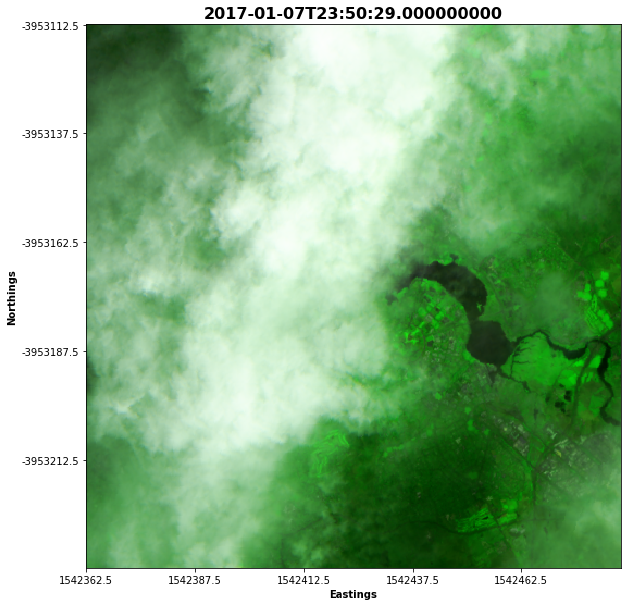

In [63]:
three_band_image(ds, bands = ['red', 'nir', 'blue'], time = 0)

### Functions Explained
NOTE: In the code below, the try/except blocks are removed to make the code shorter and easy to understand. It may, however, result in errors if you input wrong date or options in the call.

>    timesteps = ds.time.size;<br>
    num_rows = int(np.ceil(timesteps / num_cols))

In the statements above, the 'ds.time.size' is the number of scenes in the selected time range. If we want to display the images in 2-col format, then there will be 'timesteps/2' rows. If there not enough scenes to fill all rows and columns (e.g. 5 scenes will have 3 rows by 2 cols, with the last cell being empty) there will be an error in the following statements. Hence, using ***try/except*** in those cases alone to avoid the error.

> try:<br>
    &nbsp;&nbsp;&nbsp;rawimg[:, :, i] = ds[colour][numbers].values<br>
  except:<br>
    &nbsp;&nbsp;&nbsp;pass<br>
> try:<br>
    &nbsp;&nbsp;&nbsp;ax.imshow(img_toshow)<br>
    &nbsp;&nbsp;&nbsp;ax.set_title(str(ds.time[numbers].values), fontweight='bold', fontsize=12)<br>
  except:<br>
    &nbsp;&nbsp;&nbsp;pass<br>

>    fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize)

Returns the plot dimensions (fig) as a matplotlib.figure.Figure object. e.g. 720x720 pixels, derived from figsize=[10, 10]. Also returns the x and y axes as a ndarray object.

>    fig.subplots_adjust(left=left, right=right, bottom=bottom, top=top, wspace=wspace, hspace=hspace)

Tune the subplot layout. The parameter meanings are:


| Param | Value | Description |
|-|-|-|
| left  | 0.125  | left side of the subplots of the figure|
| right | 0.9    | right side of the subplots of the figure|
| bottom | 0.1   | bottom of the subplots of the figure|
| top | 0.9      | top of the subplots of the figure|
| wspace | 0.2   | amount of width reserved for space between subplots, expressed as a fraction of the average axis width|
| hspace | 0.2   | amount of height reserved for space between subplots, expressed as a fraction of the average axis height|

>    numbers = 0

Each scene is a dimension in the ndarray. the above variable slects each to fill the ndarray and plot it.

See <a href="#a1">the descriptions</a> for the remaining statements below.

- t, y, x = ds[bands[0]].shape
- rawimg = np.zeros((y, x, 3), dtype=np.float32)
- rawimg[rawimg == -999] = np.nan
- img_toshow = exposure.equalize_hist(rawimg, mask=np.isfinite(rawimg))
- ax.imshow(img_toshow)
- ax.set_title(str(ds.time[numbers].values), fontweight='bold', fontsize=12)
- ax.set_xticklabels(ds.x.values, fontsize=8, rotation=20)
- ax.set_yticklabels(ds.y.values, fontsize=8)
- ax.set_xlabel('Longitude', fontweight='bold', fontsize=10)
- ax.set_ylabel('Latitude', fontweight='bold', fontsize=10)
- ax.set_xlabel('Eastings', fontweight='bold', fontsize=10)
- ax.set_ylabel('Northings', fontweight='bold', fontsize=10)


In [64]:
def three_band_image_subplots(ds, bands, num_cols, contrast_enhance=False, figsize=[10, 10],
projection='projected', left=0.125, right=0.9, bottom=0.1, top=0.9, wspace=0.2, hspace=0.4):  

    # Find the number of rows/columns we need, based on the number of time steps in ds
    timesteps = ds.time.size
    num_rows = int(np.ceil(timesteps / num_cols))
    fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    fig.subplots_adjust(left=left, right=right, bottom=bottom, top=top, wspace=wspace, hspace=hspace)
    numbers = 0
    for ax in axes.flat:
        
        t, y, x = ds[bands[0]].shape
        rawimg = np.zeros((y, x, 3), dtype=np.float32)
        for i, colour in enumerate(bands):
            try:
                rawimg[:, :, i] = ds[colour][numbers].values
            except:
                pass

        rawimg[rawimg == -999] = np.nan

        if contrast_enhance:
            img_toshow = exposure.equalize_hist(rawimg, mask=np.isfinite(rawimg))

        else:
            img_toshow = rawimg / 5000

        try:
            ax.imshow(img_toshow)
            ax.set_title(str(ds.time[numbers].values), fontweight='bold', fontsize=12)
        except:
            pass

        ax.set_xticklabels(ds.x.values, fontsize=8, rotation=20)
        ax.set_yticklabels(ds.y.values, fontsize=8)

        if projection == 'geographic':
            ax.set_xlabel('Longitude', fontweight='bold', fontsize=10)
            ax.set_ylabel('Latitude', fontweight='bold', fontsize=10)

        else:
            ax.set_xlabel('Eastings', fontweight='bold', fontsize=10)
            ax.set_ylabel('Northings', fontweight='bold', fontsize=10)

        numbers = numbers + 1


### Plot this scene up as true colour image
True colour images approximate what the human eye sees when looking at a landscape. Note that the function used for this true colour plot enhances the contrast between the bands, resulting in a colour-enhanced image.

In the code below we are plotting the three visible bands. The **time=0** parameter indicates which scene we choose to plot. Since the frequency of scenes is 16 days apart, if the date range is less than 16 days there will only be one scene. Hence, "time=1" will give an error. Perhaps, a safe way is to keep the time=0 as it is, and change it only if you know that there will be more than one scene in your date range.

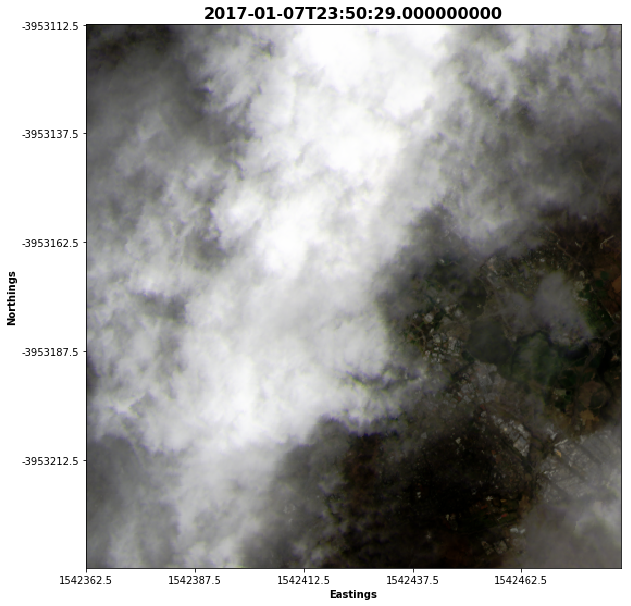

In [65]:
#DEAPlotting.three_band_image(ds, bands = ['red', 'green', 'blue'], time = 1)
three_band_image(ds, bands = ['red', 'green', 'blue'], time = 0)

### Plot this scene up as false colour image
This plot uses the SWIR and NIR bands to accentuate the presence of water in the landscape.

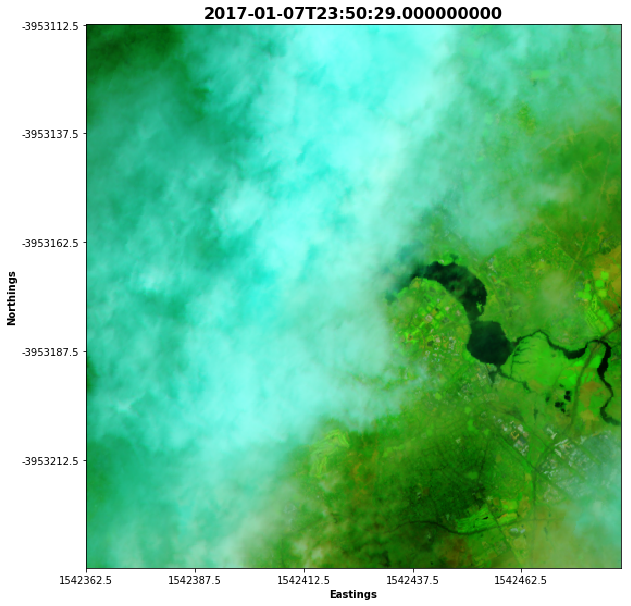

In [66]:
#DEAPlotting.three_band_image(ds, bands = ['swir1','nir', 'green'], time = 1)
three_band_image(ds, bands = ['swir1','nir', 'green'], time = 0)

### Compare some scenes side-by-side¶


**def three_band_image_subplots():**

This function takes three spectral bands and multiple time steps, and plots them on the RGB bands of an image. 

Last modified: March 2018
- Author: Mike Barnes
- Modified by: Claire Krause, Robbi Bishop-Taylor

Inputs: 
- ds - dataset containing the bands to be plotted
- bands - list of three bands to be plotted
- num_cols - number of columns for the subplot

Optional:
- contrast_enhance - determines the transformation for plotting onto RGB. If contrast_enhance = true, exposure.equalize_hist is used to transform the data. Else, the data are standardised relative to reflectance = 5000
- figsize - dimensions for the output figure
- projection - options are 'projected' or 'geographic'; determines if image is in degrees or northings
- left  - the space on the left side of the subplots of the figure
- right - the space on the right side of the subplots of the figure
- bottom - the space on the bottom of the subplots of the figure
- top - the space on the top of the subplots of the figure
- wspace - the amount of width reserved for blank space between subplots
- hspace - the amount of height reserved for white space between subplots


In [67]:
#DEAPlotting.three_band_image_subplots(ds, bands = ['swir1','nir','green'], num_cols = 2, figsize = [10, 10], wspace = 0.35)
#import os
#import sys
#f = open(os.devnull, 'w')
#sys.stdout = f
print(ds)
#three_band_image_subplots(ds, bands = ['swir1','nir','green'], num_cols = 2, figsize = [10, 10], wspace = 0.35)

<xarray.Dataset>
Dimensions:          (time: 2, x: 492, y: 500)
Coordinates:
  * time             (time) datetime64[ns] 2017-01-07T23:50:29 ...
  * y                (y) float64 -3.953e+06 -3.953e+06 -3.953e+06 -3.953e+06 ...
  * x                (x) float64 1.542e+06 1.542e+06 1.542e+06 1.542e+06 ...
Data variables:
    coastal_aerosol  (time, y, x) int16 1491 1547 1622 1593 1577 1570 1560 ...
    blue             (time, y, x) int16 1380 1394 1492 1479 1455 1438 1407 ...
    green            (time, y, x) int16 1469 1506 1515 1503 1501 1535 1564 ...
    red              (time, y, x) int16 1458 1509 1521 1507 1502 1514 1532 ...
    nir              (time, y, x) int16 2190 2242 2278 2283 2251 2241 2299 ...
    swir1            (time, y, x) int16 1294 1266 1257 1267 1285 1322 1337 ...
    swir2            (time, y, x) int16 1076 1064 1059 1055 1065 1096 1113 ...
Attributes:
    crs:      EPSG:3577


### Filter the scenes using pixel quality¶
A pixel quality dataset is provided alongside the spectral data, which can be used to filter out noisy pixels. The key things we want to filter are clouds and shadows.

The pixel quality field contains values from 0 to 5.

|Value |Description |
|-----|------------|
|0 | Null |
|1 | Valid |
|2 | Cloud |
|3 | Cloud shadow |
|4 | Snow |
|5 | Water |

In the Sentinel data, clear pixels are denoted as 1 in the pixel quality mask. We can use this to filter a cloudy image.

### Here is the cloudy image we would like to mask¶


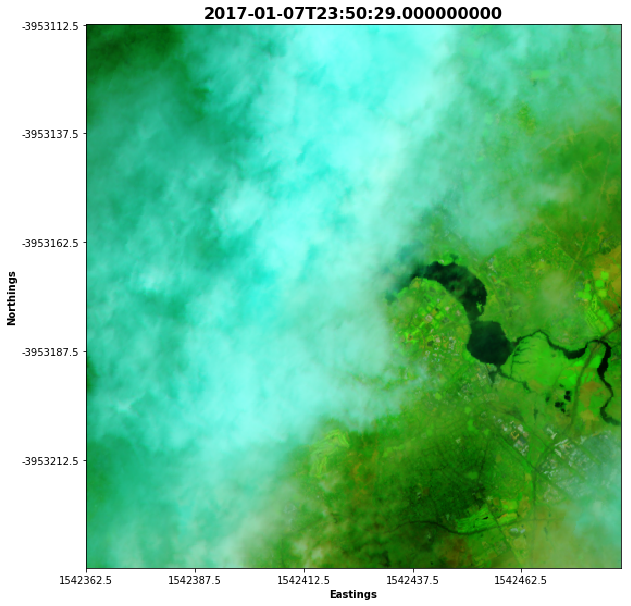

In [68]:
#DEAPlotting.three_band_image(ds, bands = ['swir1','nir','green'], time = 1)
three_band_image(ds, bands = ['swir1','nir','green'], time = 0)

### Plot up the pixel quality information for the same scene¶


### Now use the pixel quality information to create a mask, and apply it to the spectral data¶
We want to filter out cloud and cloud shadow, so we will use the pixelquality values 2 and 3 for our filter.

## -- End of page --
</div>
